## Coronavirus(Covid-19) Dashboard           

In [463]:
#pip install voila

In [1]:
#pip install --user uk-covid19

All data has been accessed via API through the Public Health England website. https://www.gov.uk/government/organisations/public-health-england

Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age(WHO).

Globally, as of 6:59pm CET, 6 December 2023, there have been 772,138,818 confirmed cases of COVID-19, including 6,985,964 deaths, reported to WHO. As of 26 November 2023, a total of 13,595,721,080 vaccine doses have been administered. 

Controlling the spread of covid-19 requires keeping the public and leaders in the government and healthcare industries updated on the coronavirus pandemic's developments. That is why this Covid-19 Dashboard, presents daily counts of COVID-19 cases, New Cases By Publish Date, Cumulative Cases, hospitals, deaths and Daily Deaths reported by Scotland for the below time period:

In [49]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [50]:
#FILTERS
filters = [
    'areaType=nation',
    'areaName=Scotland'
]

#STRUCTURE
structure = {
    "date": "date",
    "cases": "newCasesBySpecimenDateRollingRate",
    "newCasesByPublishDate":"newCasesByPublishDate",
    "cumulativeCases":"cumCasesByPublishDate",
    "hospital":"newAdmissionsRollingRate",
    "deaths": "newDailyNsoDeathsByDeathDate",
    "dailyDeaths":"newDeaths28DaysByPublishDate"
}

In [51]:
#Accessing the API by creating a Cov19API object

api = Cov19API(filters=filters, structure=structure)

In [52]:
timeseries=api.get_json()
#print(timeseries)

In [53]:
#print(type(timeseries)) 

In [54]:
with open("timeseries.json", "wt") as OUTF:
    json.dump(timeseries, OUTF)

In [55]:
# Load JSON files and store the raw data in some variable. Edit as appropriate
jsondata={
   "date": "date",
    "cases": "newCasesBySpecimenDateRollingRate",
    "newCasesByPublishDate":"newCasesByPublishDate",
    "cumulativeCases":"cumCasesByPublishDate",
    "hospital":"newAdmissionsRollingRate",
    "deaths": "newDailyNsoDeathsByDeathDate",
    "dailyDeaths":"newDeaths28DaysByPublishDate"
}
#print (jsondata)

In [56]:
def wrangle_data(rawdata):
    """ Parameters: rawdata - data from json file or API call. Returns a dataframe.
    Edit to include the code that wrangles the data, creates the dataframe and fills it in. """
    df=pd.DataFrame(index=range(0,100), columns=['One', 'Two'])

    one=two=0.0
    for i in range(0,100):
        df.loc[i,'One']=one
        df.loc[i,'Two']=two
        one+=np.random.randn()
        two+=2*np.random.randn()
    return df

# putting the wrangling code into a function allows you to call it again after refreshing the data through 
# the API. You should call the function directly on the JSON data when the dashboard starts, by including 
# the call in this cell as below:
df=wrangle_data(jsondata) # df is the dataframe for plotting

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# make figures larger
plt.rcParams['figure.dpi'] = 100

In [58]:
#Time series Data

with open("timeseries.json", "rt") as INFILE:
    data=json.load(INFILE)

In [59]:
#data

In [60]:
#WRANGLING THE DATA
datalist=data['data']
#datalist

In [61]:
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()
#dates

In [62]:
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print (startdate, ' to ', enddate)

index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['cases','newCasesByPublishDate','CumulativeCases','hospital','dailyDeaths','deaths'])
#timeseriesdf

2020-03-02 00:00:00  to  2023-11-22 00:00:00


In [63]:
for entry in datalist: # each entry is a dictionary with date, cases, hospital and deaths
    date=parse_date(entry['date'])
    for column in ['cases', 'hospital', 'deaths']:
        # check that nothing is there yet - just in case some dates are duplicated,
        # maybe with data for different columns in each entry
        if pd.isna(timeseriesdf.loc[date, column]): 
            # replace None with 0 in our data 
            value= float(entry[column]) if entry[column]!=None else 0.0
            # this is the way you access a specific location in the dataframe - use .loc
            # and put index,column in a single set of [ ]
            timeseriesdf.loc[date, column]=value
            
# fill in any remaining "holes" due to missing dates
timeseriesdf.fillna(0.0, inplace=True)
            
#timeseriesdf


## Time series Data

## Unstacked Area Plot

The time series (unstacked) area plot tracks cases, newCasesByPublishDate, cumulativeCases, hospitals, deaths and dailyDeaths in Scotland from March 2020 to November 2023.

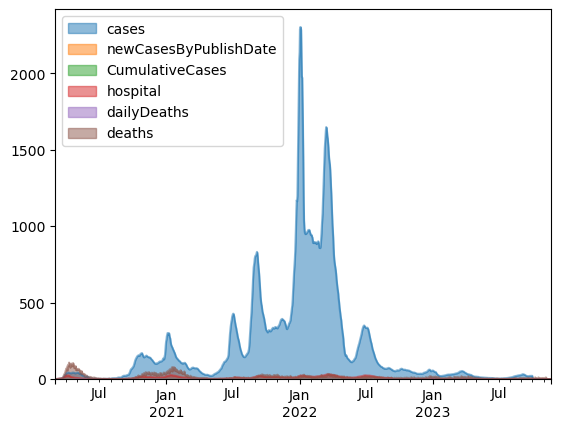

In [64]:
timeseriesdf.plot.area(stacked=False);

## Linear graph

The time series LINEAR graph tracks cases, newCasesByPublishDate, cumulativeCases, hospitals, deaths and dailyDeaths in Scotland from March 2020 to November 2023.

<Axes: >

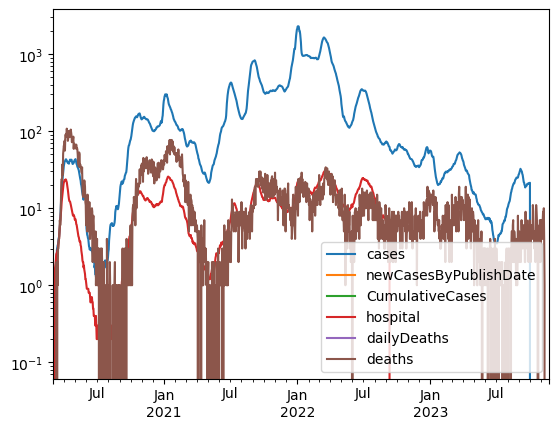

In [65]:
timeseriesdf.plot(logy=True)

## BAR Graph

The time series BAR graph tracks cases, newCasesByPublishDate, cumulativeCases, hospitals, deaths and dailyDeaths in Scotland from March 2020 to November 2023.

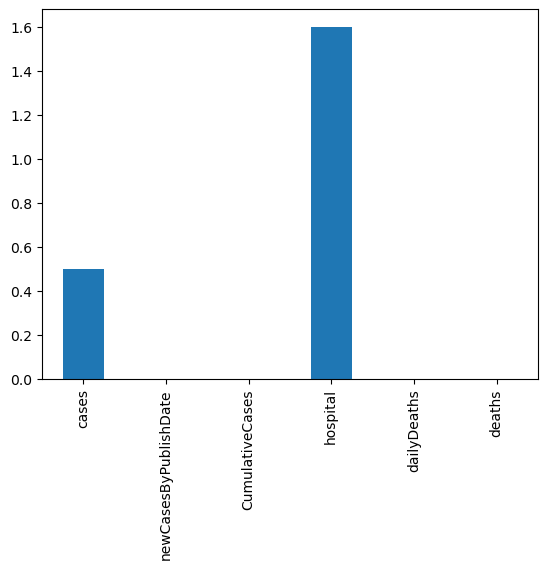

In [66]:
plt.figure();

timeseriesdf.iloc[5].plot(kind="bar");

In [67]:
#DataMunging
with open("agedistribution.json", "rt") as INFILE:
    data=json.load(INFILE)

In [68]:
#data

In [69]:
datadic=data['data'][0] # data['data'] is a list
#datadic

In [70]:
males=datadic['males']
#males

In [71]:
ageranges=[x['age'] for x in males] # each entry of males is a dictionary
#print(ageranges)

In [72]:
def min_age(agerange):
    agerange=agerange.replace('+','') # remove the + from 90+
    start=agerange.split('_')[0]
    return int(start)

#print(min_age('85_to_89'))
#print(min_age('90'))

In [73]:
ageranges.sort(key=min_age)
#print (ageranges)

In [74]:
females=datadic['females']
#females

In [75]:
ageranges=[x['age'] for x in females] # each entry of females is a dictionary

In [76]:
def min_age(agerange):
    agerange=agerange.replace('+','') # remove the + from 90+
    start=agerange.split('_')[0]
    return int(start)

#print(min_age('20_to_44'))
#print(min_age('45'))

In [77]:
ageranges.sort(key=min_age)

In [78]:
age_df=pd.DataFrame(index=ageranges, columns=['males','females', 'total'])

## Gender and Age Data

The table below displays Age ranges for males and females in the form of a table. 

In [79]:
for entry in males: # each entry is a dictionary
    ageband=entry['age'] # our index position
    age_df.loc[ageband, 'males']=entry['value']
    
for entry in females:
    ageband=entry['age']
    age_df.loc[ageband, 'females']=entry['value']
    
# this is straightforward
age_df['total']=age_df['males']+age_df['females']
age_df

,males,females,total
0_to_4,237941,225983,463924
5_to_9,583605,566001,1149606
10_to_14,820303,812405,1632708
15_to_19,641952,763650,1405602
20_to_24,689824,892985,1582809
25_to_29,767621,987419,1755040
30_to_34,788572,1031699,1820271
35_to_39,741838,999762,1741600
40_to_44,712051,955269,1667320
45_to_49,653935,855658,1509593


## Gender and Age Bar Graph

Below is the Bar graph representation of males and females and their age. While more men died from COVID-19, women’s well-being was more negatively affected than men’s during the first year of the pandemic.

For all age groups people identifying as female had more positive results than people who identify as male, except 0 to 9 years and 70 to 79 years. However, because people who identify as female were also more likely to get tested, this may not accurately reflect the overall population with COVID-19(gov.uk).

<Axes: >

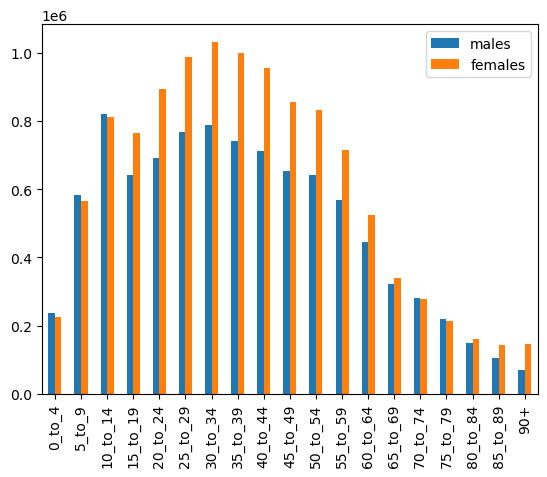

In [80]:
age_df.plot(kind='bar', y=['males','females'])

## Bar Graph Representation on total cases per age range

For both genders, the number of people newly testing positive increases up to 20 to 29 years. The number of people testing positive then decreases by age for both genders, until between the ages of 80 to 89 years where there is an increase in the number of people newly testing positive who identify as female.

<Axes: >

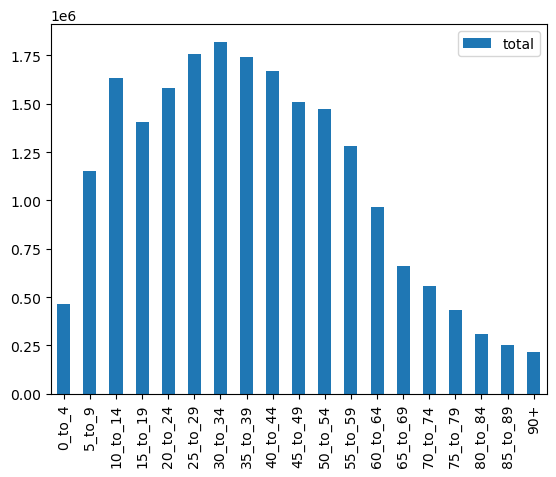

In [81]:
age_df.plot(kind='bar', y='total')

In [82]:
# pandas makes saving to a pickle file dead easy:
timeseriesdf.to_pickle("timeseriesdf.pkl")
age_df.to_pickle("agedf.pkl")

In [83]:
#3. Adding Interactive Controls 

In [84]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

## Refresh and stay up to date with the latest data

In this section of the dashboard, users may refresh the data by clicking once on the "refresh" button and to download, click the "Download data" button. The button callback will retrieve the most recent data from the Public Health England Website. 

In [85]:
# Place your API access code in this function. Do not call this function directly; it will be called by 
# the button callback. 
def access_api():
    """ Accesses the PHE API. Return data as a like-for-like replacement for the "canned" data loaded from the JSON file. """
    return {} # return data read from the API

In [86]:
# Printout from this function will be lost in Voila unless captured in an
# output widget - therefore, we give feedback to the user by changing the 
# appearance of the button
def api_button_callback(button):
    """ Button callback - it must take the button as its parameter (unused in this case).
    Accesses API, wrangles data, updates global variable df used for plotting. """
    # Get fresh data from the API. If you have time, include some error handling
    # around this call.
    apidata=access_api()
    # wrangle the data and overwrite the dataframe for plotting
    global df
    df=wrangle_data(apidata)
    # the graph won't refresh until the user interacts with the widget.
    # this function simulates the interaction.
    # The function needs to be adapted to your graph; you can omit this call
    # in the first instance
    refresh_graph()
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again. If you are 
    # implementing error handling, you can use icons "unlink" or "times" and 
    # change the button text to "Unavailable" when the api call fails.
    apibutton.icon="check"
    # apibutton.disabled=True

    
apibutton=wdg.Button(
    description='Refresh', # you may want to change this...
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Keep calm and carry on",
    # FontAwesome names without the `fa-` prefix - try "download"
    icon='refresh'
)

# remember to register your button callback function with the button
apibutton.on_click(api_button_callback) # the name of your function inside these brackets

display(apibutton)


Button(button_style='success', description='Refresh', icon='refresh', style=ButtonStyle(), tooltip='Keep calm …

In [87]:
# our API access function. This will be called by the button when it is clicked
def access_api(button):
    # Ignore the button parameter
    #
    # put code for polling the API here
    api = Cov19API(filters=filters, structure=structure)
    #
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again.
    apibutton.icon="check"
    apibutton.disabled=True

# see the doc for the parameters    
apibutton=wdg.Button(
    description='Download data',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to download current Public Health England data',
    icon='download' # (FontAwesome names without the fa- prefix)
)

# register the callback function with the button
apibutton.on_click(access_api)

# this is an iPython function that generalises print for Jupyter Notebooks; we use it to 
# display the widgets
display(apibutton)

Button(button_style='info', description='Download data', icon='download', style=ButtonStyle(), tooltip='Click …

## Interactive Graph

You can use the interactive graph here to view the data for cases, hospital, deaths, new cases By Publish Date, Daily Deaths. You may view this by selecting on the Statistics and the scale button which will allow you to view the data in a different graph formats such as linear, log, area plot. 

In [88]:
series=wdg.SelectMultiple(
    options=['cases', 'hospital', 'deaths','newCasesByPublishDate','dailyDeaths'],
    value=['cases', 'hospital', 'deaths','newCasesByPublishDate','dailyDeaths'],
    rows=5,
    description='Statictics:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear','log', 'area'],
#   value='pineapple', # Defaults to 'pineapple'
#   layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

# try replacing HBox with a VBox
controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='log':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
        plt.show() # important - graphs won't update if this is missing 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); 
# capture output in widget graph   
graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Output()

In [89]:
## Deploying the dashboard
#Once your code is ready and you are satisfied with the appearance of the graphs, replace all the text boxes above with the explanations you would like a dashboard user to see. The next step is deploying the dashboard online - there are several [options](https://voila.readthedocs.io/en/stable/deploy.html) for this, we suggest deploying as a [Binder](https://mybinder.org/). This is basically the same technique that has been used to package this tutorial and to deploy this template dashboard. The instructions may seem a bit involved, but the actual steps are surprisingly easy - we will be going through them together during a live session. You will need an account on [GitHub](https://github.com/) for this - if you don't have one already, now it's the time to create it. 

## Source acknowledgement: 
Based on UK Government [data](https://coronavirus.data.gov.uk/) published by [Public Health England](https://www.gov.uk/government/organisations/public-health-england) and on the [DIY Covid Dashboard Kit](https://github.com/cgunaseelan/diy-covid19dash), Copyright (C) Catherine Gunaseelan 2020,2023. c.j.gunaseelan@se23.qmul.ac.uk
Released under the [GNU GPLv3.0 or later](https://www.gnu.org/licenses/).